<a href="https://colab.research.google.com/github/Dak-lin-e/colab-practice/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_%EC%97%B0%EC%8A%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 4 모델 세부 설정


import tensorflow as tf

# 케라스의 내장데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

#load_data로 데이터셋 로드
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print("데이터셋 크기:", x_train.shape, y_train.shape)
print("데이터셋 크기:", x_test.shape, y_test.shape)

#데이터정규화
x_train =x_train / x_train.max()
x_test =x_test / x_test.max()

데이터셋 크기: (60000, 28, 28) (60000,)
데이터셋 크기: (10000, 28, 28) (10000,)


In [15]:
# 4-1
# 초기값 설정
# 레이어의 초기화 방법을 다르게 설정 가능. dense 레이어는 기본초기화 방법으로 Glorot Uniform 초기화 방법이 설정

dense= tf.keras.layers.Dense(256,activation='relu')
dense.get_config()['kernel_initializer']
# GlorotUniform 초기화방법을 HeNormal로 변경하기위해서는 kernel_initializer매개변수에 설정하면 됨.

# 문자열 초기화
dense= tf.keras.layers.Dense(256,activation='relu',kernel_initializer='he_normal')
print(dense.get_config()['kernel_initializer'])


# 클래스인스턴스 초기화
he_normal=tf.keras.initializers.HeNormal()
dense= tf.keras.layers.Dense(256,activation='relu',kernel_initializer=he_normal)
print(dense.get_config()['kernel_initializer'])

# 케라스에서 지원하는 자주 사용되는 초기화 목록
# glorot_normal, uniform / lecun_normal,uniform/ he_normal,uniform / random_normal,uniform

{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}
{'module': 'keras.initializers', 'class_name': 'HeNormal', 'config': {'seed': None}, 'registered_name': None}


In [19]:
# 4-2
# regularization = 규제

# 모델의 과적합을 해소하기위해 L1, L2 규제를 적용(keras에서 지원해주는 건 이거 2개)
# 기본값으로 규제를 적용하지 않음!
# 규제 설정을 위해서는 별도로 해줘야함

# L1 규제적용
dense=tf.keras.layers.Dense(256, kernel_regularizer='L1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스인스턴스 적용 , alpha=0.1 변경
regularizer=tf.keras.regularizers.l1(l1=0.1)
dense=tf.keras.layers.Dense(256,kernel_regularizer=regularizer,activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.009999999776482582}, 'registered_name': None}
{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.10000000149011612}, 'registered_name': None}


In [20]:
# 4-3
# dropout
# 노드의 일부신호를 임의로 삭제하여 과대적합 방지
# 훈련할때만 드롭아웃 적용. 예측에서는 모든 노드들 활용

# dropout 비율 25% 적용
tf.keras.layers.Dropout(0.25)

<Dropout name=dropout, built=False>

In [21]:
# 4-4
# 배치정규화
# 각 층에서 활성화함수를 통과하기 전 미니배치의 스케일을 정규화함.
# 다음 층을 데이터 전달 전, 스케일을 조정하여 안정적인 훈련이 가능 , 성능향상


# model: dense + relu + batch
model_B = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          # 배치정규화 적용
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(128,activation='relu'),
          # 배치정규화 적용
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10,activation='softmax'),
                                      ])

model_B.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,418 (411.79 KB)

 Trainable params: 103,594 (404.66 KB)

 Non-trainable params: 1,824 (7.12 KB)

In [12]:
# 4-5

# 활성화함수
# 케라스가 지원하는 다른 활성화함수를 적용, 클래스인스턴스로 선언하여 하이퍼파라미터 값을 변경하여 적용

# leaky relu 기본설정
tf.keras.layers.LeakyReLU()
# Leakt Relu , alpha=0.2 로 설정
tf.keras.layers.LeakyReLU(alpha=0.2)

# Model_C : dense + batch + leakyrelu
model_C = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(128),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(alpha=0.2) ,
          tf.keras.layers.Dense(64),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.LeakyReLU(alpha=0.2),
          tf.keras.layers.Dense(10,activation='softmax'),
                            ])

model_C.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_16 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_17 (LeakyReLU)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [23]:
model_B.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_C.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_b=model_B.fit(x_train, y_train, validation_data=(x_test,y_test) ,epochs=10)
history_c=model_C.fit(x_train, y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8833 - loss: 0.3775 - val_accuracy: 0.9609 - val_loss: 0.1289
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9603 - loss: 0.1286 - val_accuracy: 0.9702 - val_loss: 0.1114
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9718 - loss: 0.0885 - val_accuracy: 0.9725 - val_loss: 0.1039
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9788 - loss: 0.0685 - val_accuracy: 0.9732 - val_loss: 0.1054
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9798 - loss: 0.0642 - val_accuracy: 0.9743 - val_loss: 0.1035
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9828 - loss: 0.0534 - val_accuracy: 0.9756 - val_loss: 0.1057
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9846 - loss: 0.0471 - val_accuracy: 0.9744 - val_loss: 0.1067
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9862 - loss: 0.

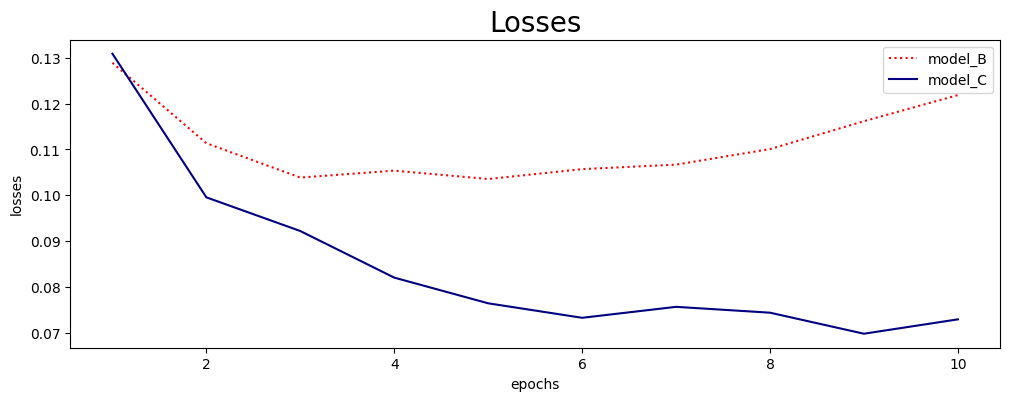

In [25]:
# 결과 시각화

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,4))
plt.plot(np.arange(1,11),history_b.history['val_loss'], color='red' , linestyle=':')
plt.plot(np.arange(1,11),history_c.history['val_loss'] ,color='navy' , linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['model_B','model_C'])
plt.show()

In [1]:
!git clone https://github.com/Dak-lin-e/repositories.git


Cloning into 'Dak-lin-e?tab=repositories'...
fatal: https://github.com/Dak-lin-e?tab=repositories/info/refs not valid: is this a git repository?


In [43]:
cd /content/colab-practice

/content/colab-practice


In [47]:
!git push -u origin master


error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/Dak-lin-e/colab-practice.git'


In [44]:
!git config --global user.email 'ju231568@gmail.com'
!git config --global user.name 'Dak-lin-e'

In [38]:
!git status

On branch main

No commits yet

nothing to commit (create/copy files and use "git add" to track)
